In [1]:
from importlib import reload
import sys, os

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [150]:
from ftnmr import *

In [151]:
a = fid(shift=10, B=10.0, T2=100, t_cut=601)

In [152]:
b = lorentzian(ob=a)

In [153]:
b.p

15

In [154]:
b.f.shape

(32768,)

In [155]:
pow(2, b.p -3)

4096

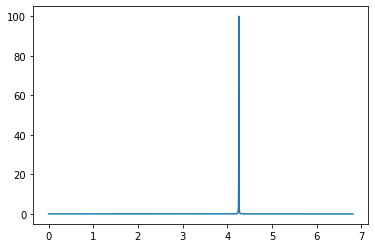

In [156]:
plt.plot(b.f[:pow(2, b.p -3)], b.lorentz.real[:pow(2, b.p - 3)])

In [168]:
b.cs[pow(2, b.p - 3)]

15.999999999999998

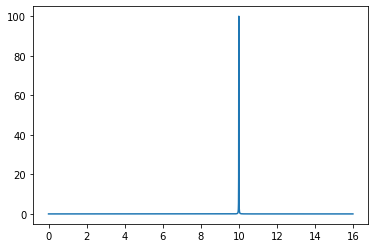

In [157]:
plt.plot(b.cs[:pow(2, b.p -3)], b.lorentz.real[:pow(2, b.p - 3)])

In [24]:
pow(2, 4)

16

In [26]:
f[:pow(2,4)]

array([0.        , 0.00166318, 0.00332637, 0.00498955, 0.00665273,
       0.00831591, 0.0099791 , 0.01164228, 0.01330546, 0.01496864,
       0.01663183, 0.01829501, 0.01995819, 0.02162138, 0.02328456,
       0.02494774])

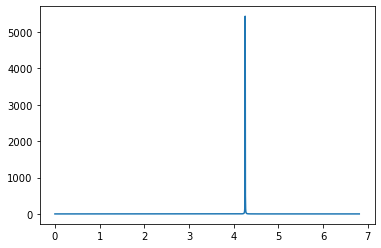

In [27]:
plt.plot(f[:pow(2,12)], S.real[:pow(2,12)])

In [113]:
np.log2(a.ns)

15.0

In [81]:
t = np.linspace(0, a.dt, 100)

In [82]:
t

array([0.        , 0.01054393, 0.02108785, 0.03163178, 0.0421757 ,
       0.05271963, 0.06326356, 0.07380748, 0.08435141, 0.09489533,
       0.10543926, 0.11598319, 0.12652711, 0.13707104, 0.14761496,
       0.15815889, 0.16870282, 0.17924674, 0.18979067, 0.20033459,
       0.21087852, 0.22142245, 0.23196637, 0.2425103 , 0.25305422,
       0.26359815, 0.27414208, 0.284686  , 0.29522993, 0.30577385,
       0.31631778, 0.32686171, 0.33740563, 0.34794956, 0.35849348,
       0.36903741, 0.37958134, 0.39012526, 0.40066919, 0.41121311,
       0.42175704, 0.43230097, 0.44284489, 0.45338882, 0.46393274,
       0.47447667, 0.4850206 , 0.49556452, 0.50610845, 0.51665237,
       0.5271963 , 0.53774023, 0.54828415, 0.55882808, 0.569372  ,
       0.57991593, 0.59045986, 0.60100378, 0.61154771, 0.62209163,
       0.63263556, 0.64317949, 0.65372341, 0.66426734, 0.67481126,
       0.68535519, 0.69589912, 0.70644304, 0.71698697, 0.72753089,
       0.73807482, 0.74861875, 0.75916267, 0.7697066 , 0.78025

In [12]:
sg.f_s*1000

1277.3243555349768

In [49]:
sg.shift

5.0

In [50]:
sg.t[-1]

12825.246719059696

In [51]:
sg.f_s

0.6386621777674883

In [54]:
sg.ns

8192

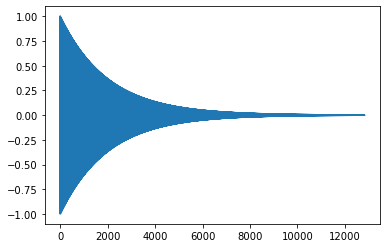

In [53]:
plt.plot(sg.t, sg.signal.real)

In [41]:
f = np.arange(0, sg.ns)*sg.f_s/sg.ns

In [89]:
np.log2(128)

7.0

In [69]:
t_cut = 121

In [70]:
f_s = 0.55

In [71]:
ns = t_cut*f_s

In [72]:
ns

66.55000000000001

In [84]:
int(np.log2(ns + 1)) + 1

7

In [85]:
pow(2, 7)

128

In [81]:
pow(2, 6)

64

In [73]:
pow(2, 5)

32

In [75]:
pow(2, 7)

128

In [60]:
int(np.log2(128))

7

In [58]:
pow(2, 7)

128

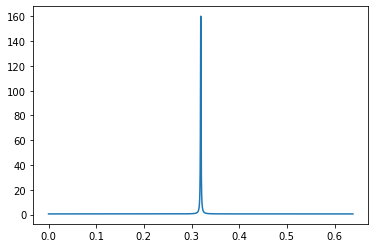

In [42]:
plt.plot(f, S.real)

In [158]:
ds = S.real - Sg().real

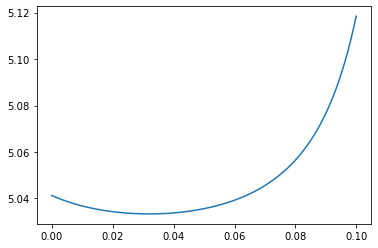

In [159]:
plt.plot(f, ds)